# Elution Range

## Overview of the Data

The data set used here for explanation looks like this.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from molass.Local import get_local_settings
from molass.DataObjects import SecSaxsData as SSD
local_settings = get_local_settings()
PKS_DATA = local_settings['PKS_DATA']
ssd = SSD(PKS_DATA)
ssd.plot_3d();

## Trimming in Elution Axis
### Trimming by Moment

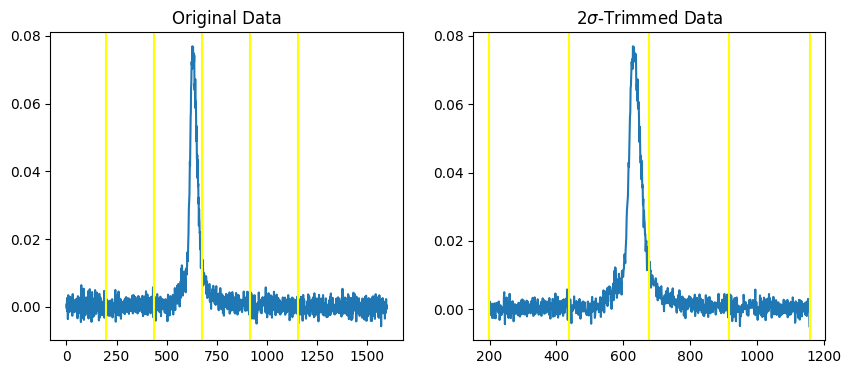

In [4]:
from molass.Stats import Moment
xr_icurve = ssd.xr.get_icurve()
uv_icurve = ssd.uv.get_icurve()
x = xr_icurve.x
y = xr_icurve.y
mt = Moment(x, y)
mean, std = mt.get_meanstd()
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.set_title("Original Data")
ax2.set_title(r"2$\sigma$-Trimmed Data")
ax1.plot(x, y)
wanted_range = np.logical_and(mean-2*std < x, x < mean+2*std)
ax2.plot(x[wanted_range], y[wanted_range])
for p in [mean-2*std, mean-std, mean, mean+std, mean+2*std]:
    for ax in ax1, ax2:
        ax.axvline(p, color='yellow')

In [5]:
mt.get_nsigma_points(2)

(199, 1157)